In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
df=pd.read_csv("water_potability.csv")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [58]:
df.isnull().sum()/len(df)

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [59]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [60]:

df.duplicated().any()

False

In [61]:
df.describe().T

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

In [62]:
df["ph"].value_counts()

3.716080    1
6.704432    1
5.915807    1
8.136498    1
6.493764    1
           ..
7.808012    1
5.895949    1
7.269652    1
9.489601    1
7.874671    1
Name: ph, Length: 2785, dtype: int64

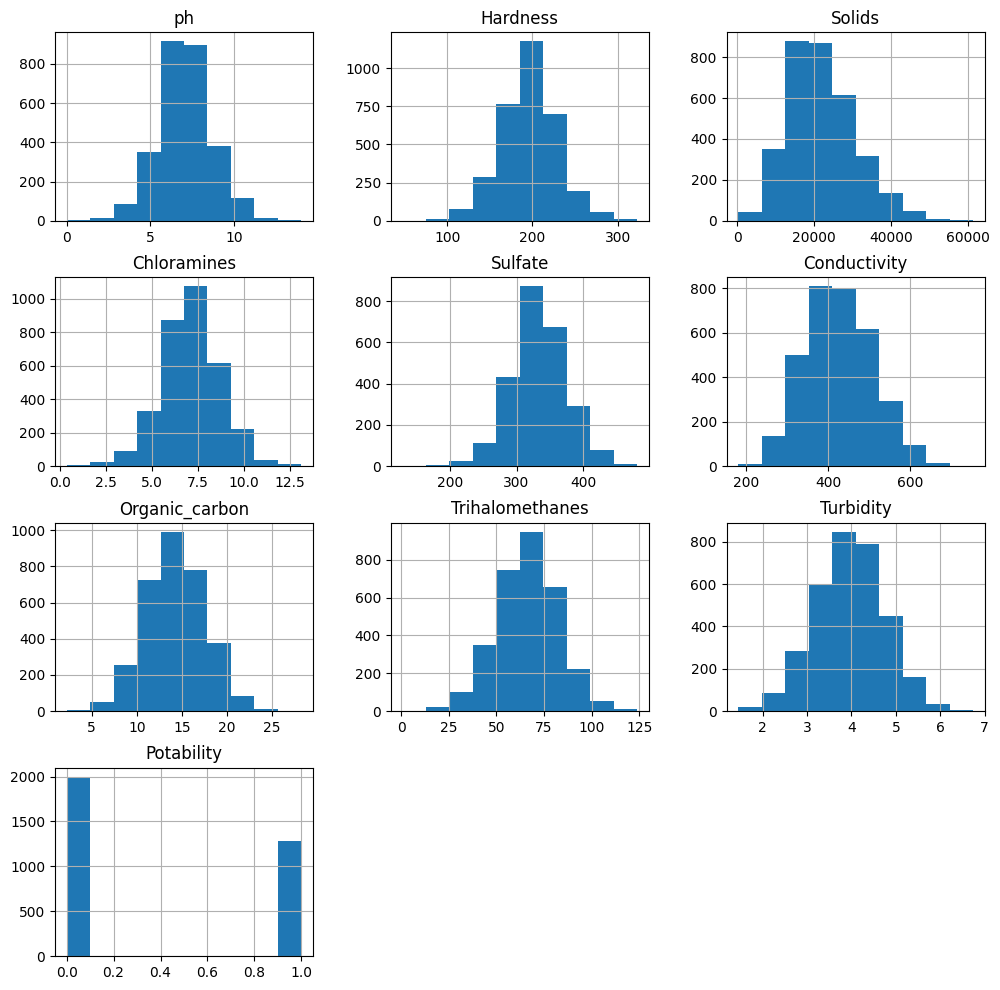

In [9]:
p=df.hist(figsize=(12,12))

In [10]:
df["ph"]=df["ph"].fillna(df["ph"].median())

In [11]:
df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean())

In [12]:
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [13]:
df.isnull().sum()/len(df)*100

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

<AxesSubplot:xlabel='Potability', ylabel='count'>

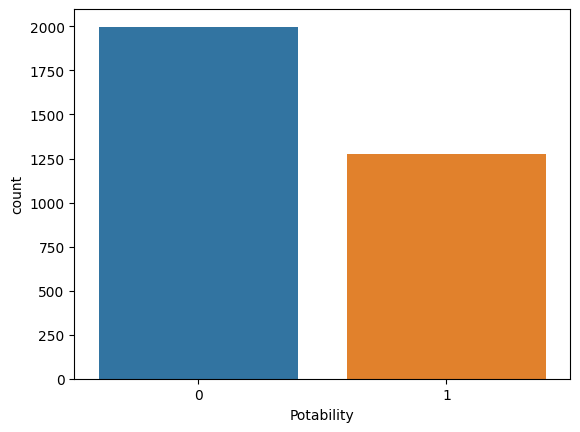

In [14]:
sns.countplot(df.Potability)

<Figure size 1400x1400 with 0 Axes>

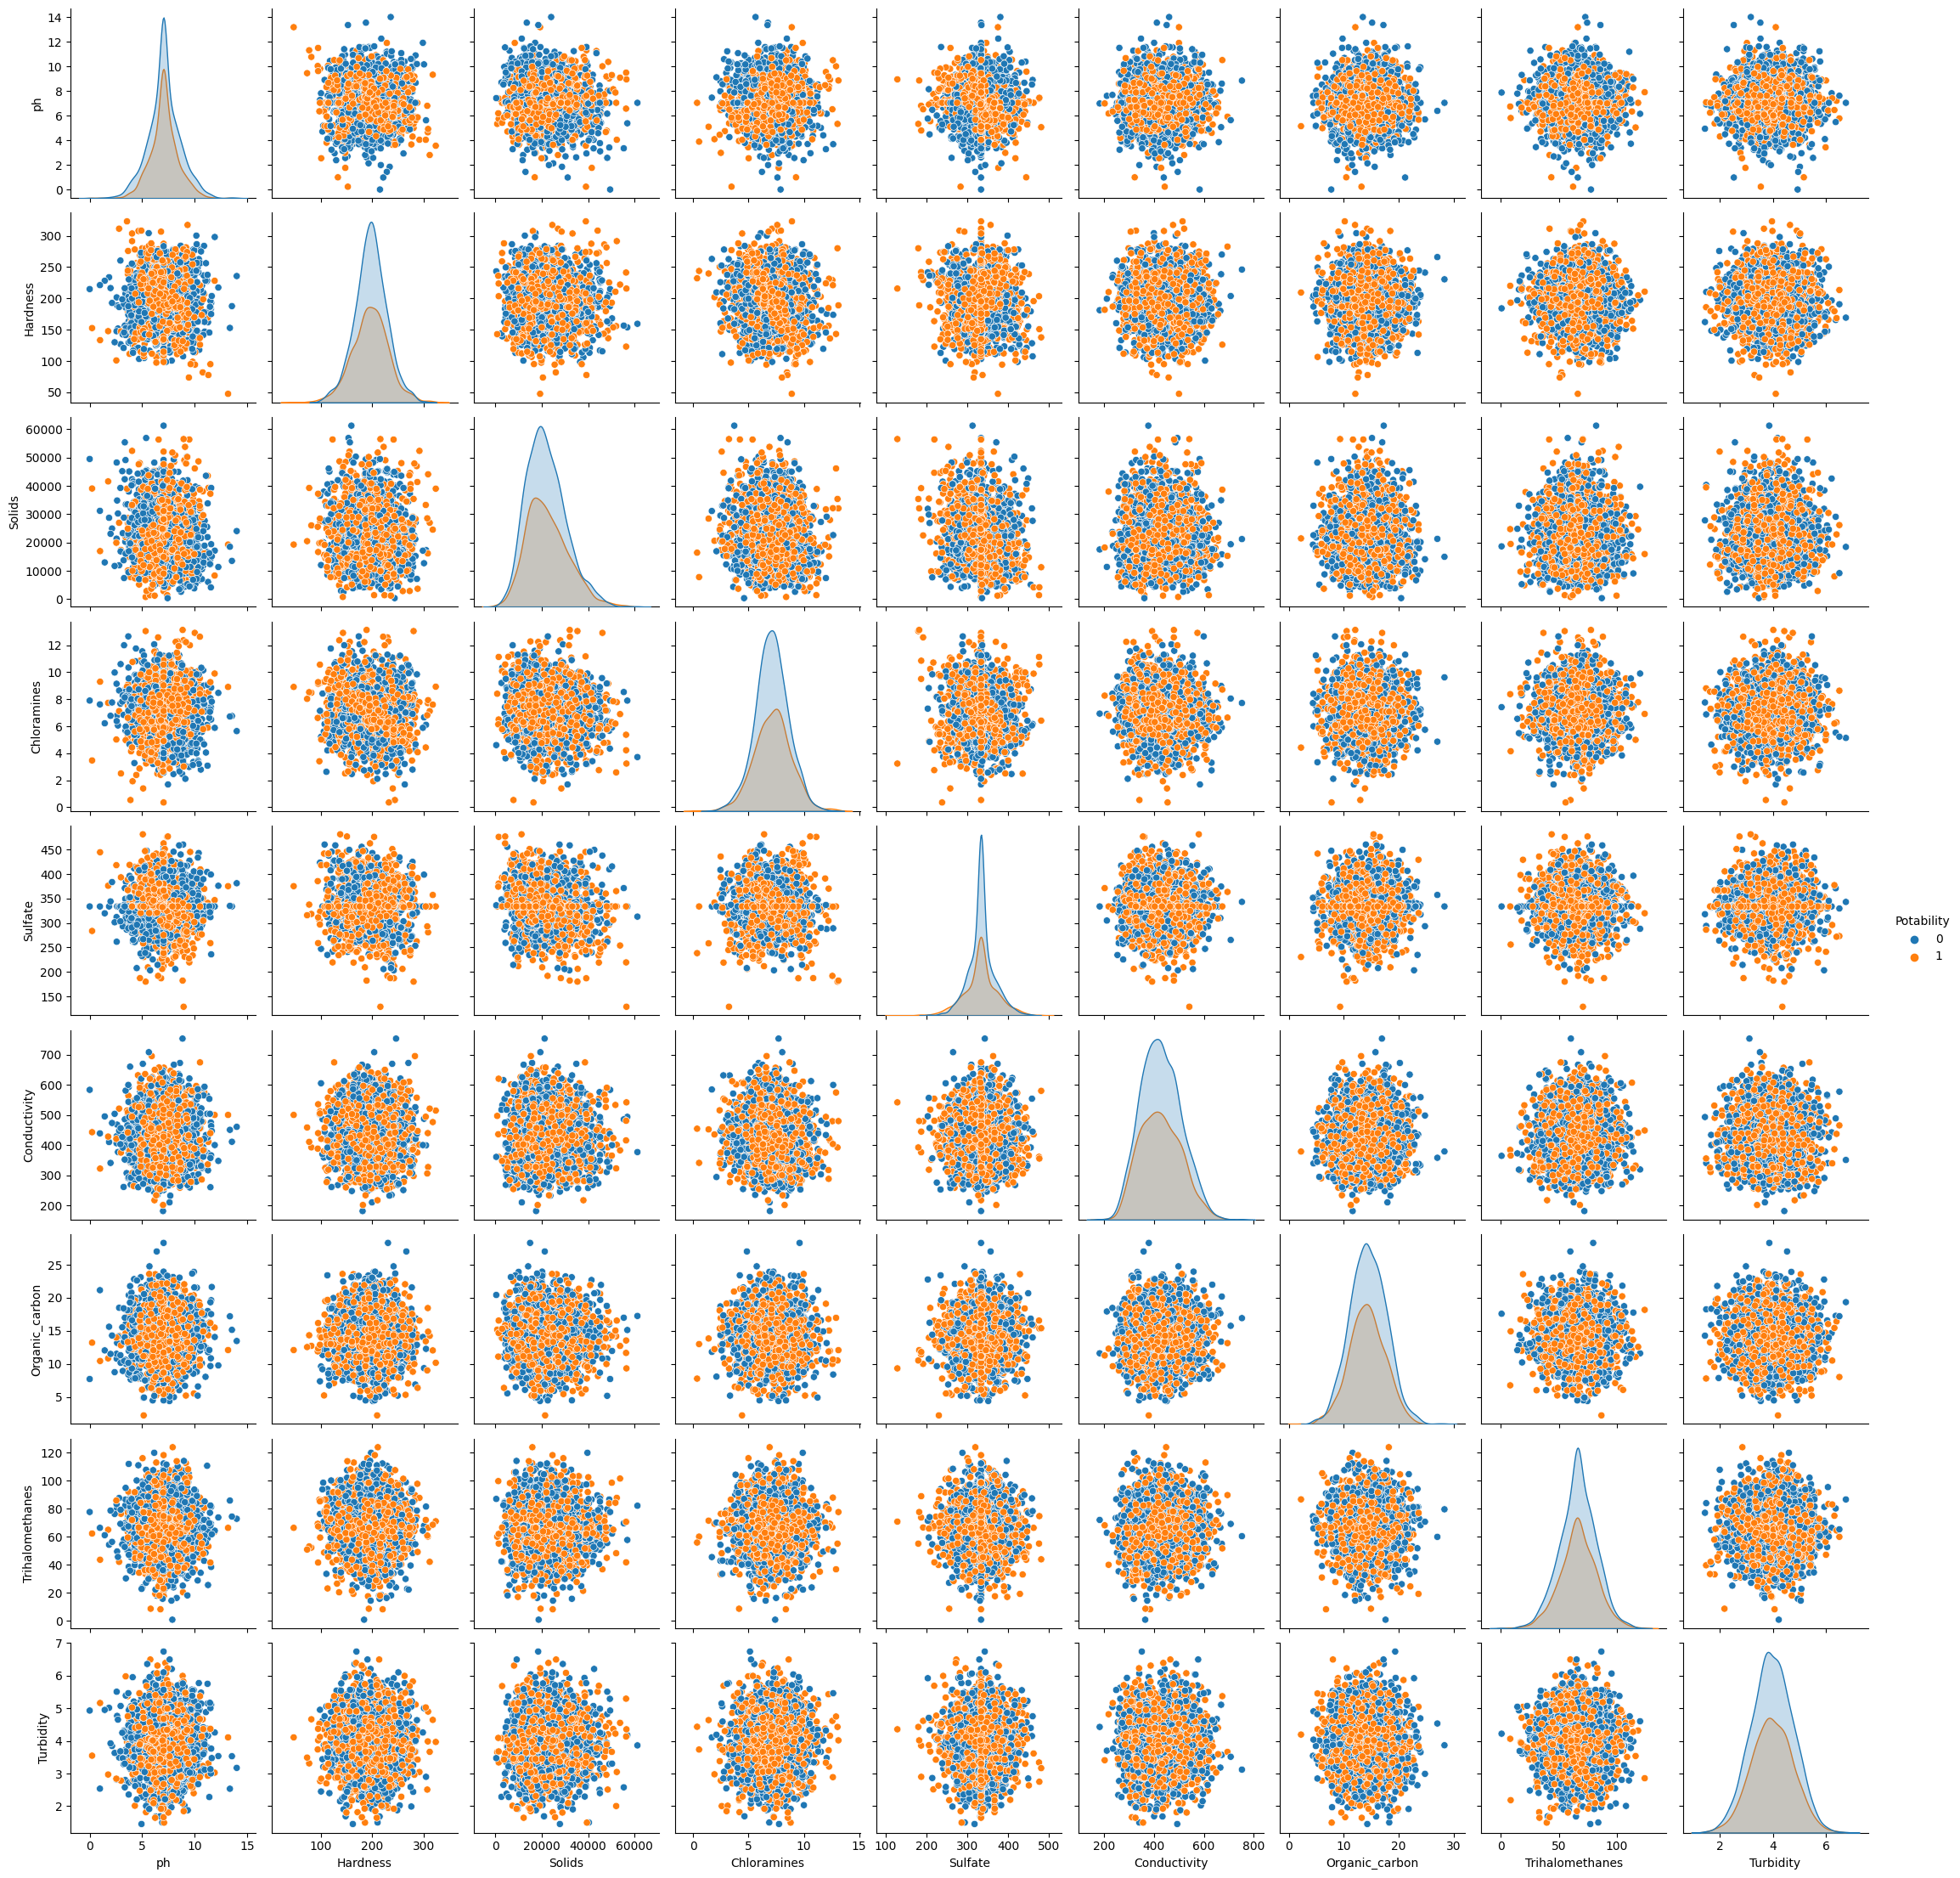

In [15]:
plt.figure(figsize=(14,14))
sns.pairplot(df,hue="Potability")

In [16]:
corr=df.corr

<AxesSubplot:>

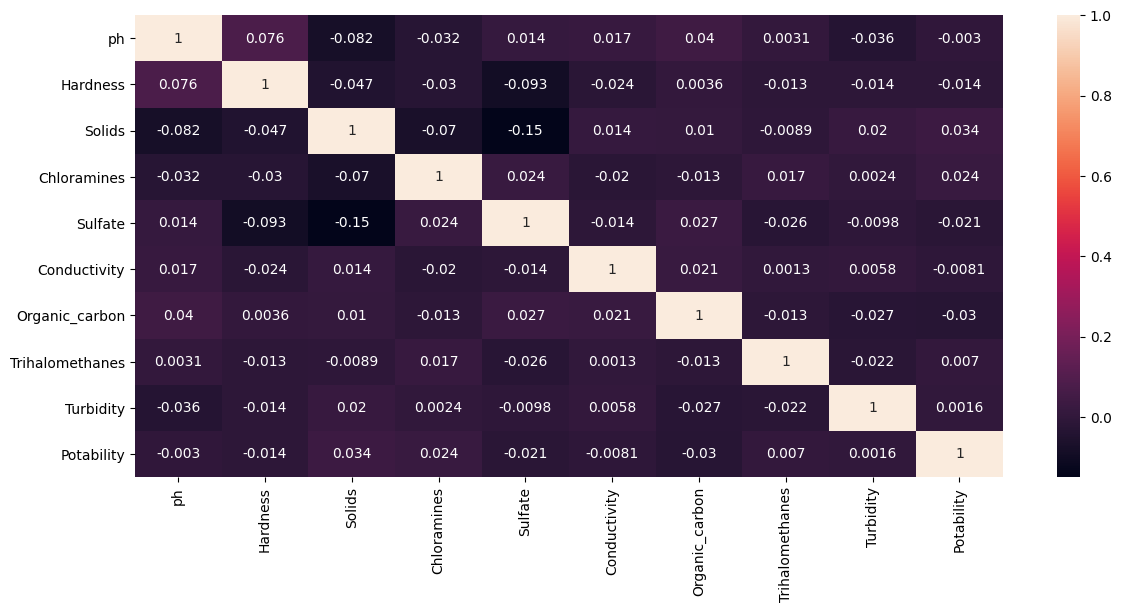

In [17]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True)

In [18]:
X=df.drop("Potability",axis=1)
y=df["Potability"]          

In [47]:
X

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.396293   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [48]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [23]:
X_train.shape

(2620, 9)

In [24]:
X_test.shape

(656, 9)

In [25]:
y_train.shape

(2620,)

In [26]:
y_test.shape

(656,)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
Sc=StandardScaler()
X_train=Sc.fit_transform(X_train)
X_test=Sc.fit_transform(X_test)

In [35]:
import xgboost as xgb

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [37]:
lr=LogisticRegression()
kn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier()
dt=DecisionTreeClassifier()
abc=AdaBoostClassifier()
xg=XGBClassifier()

In [38]:
from sklearn.metrics import classification_report
def my_model(model):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print("train data")
    print(classification_report(y_train,y_pred_train))
    print("test data")
    print(classification_report(y_test,y_pred_test))
    return model 

In [39]:
my_model(lr)

train data
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1604
           1       0.00      0.00      0.00      1016

    accuracy                           0.61      2620
   macro avg       0.31      0.50      0.38      2620
weighted avg       0.37      0.61      0.46      2620

test data
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       394
           1       0.00      0.00      0.00       262

    accuracy                           0.60       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.36      0.60      0.45       656



LogisticRegression()

In [40]:
my_model(kn)

train data
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1604
           1       0.74      0.57      0.64      1016

    accuracy                           0.76      2620
   macro avg       0.75      0.72      0.73      2620
weighted avg       0.75      0.76      0.75      2620

test data
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       394
           1       0.58      0.42      0.49       262

    accuracy                           0.65       656
   macro avg       0.63      0.61      0.61       656
weighted avg       0.64      0.65      0.63       656



KNeighborsClassifier()

In [41]:
my_model(rfc)

train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1604
           1       1.00      1.00      1.00      1016

    accuracy                           1.00      2620
   macro avg       1.00      1.00      1.00      2620
weighted avg       1.00      1.00      1.00      2620

test data
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       394
           1       0.69      0.34      0.46       262

    accuracy                           0.68       656
   macro avg       0.68      0.62      0.61       656
weighted avg       0.68      0.68      0.65       656



RandomForestClassifier()

In [44]:
my_model(abc)

train data
              precision    recall  f1-score   support

           0       0.67      0.92      0.77      1604
           1       0.68      0.27      0.39      1016

    accuracy                           0.67      2620
   macro avg       0.67      0.59      0.58      2620
weighted avg       0.67      0.67      0.62      2620

test data
              precision    recall  f1-score   support

           0       0.62      0.87      0.73       394
           1       0.52      0.21      0.30       262

    accuracy                           0.61       656
   macro avg       0.57      0.54      0.51       656
weighted avg       0.58      0.61      0.56       656



AdaBoostClassifier()

In [43]:
my_model(dt)

train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1604
           1       1.00      1.00      1.00      1016

    accuracy                           1.00      2620
   macro avg       1.00      1.00      1.00      2620
weighted avg       1.00      1.00      1.00      2620

test data
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       394
           1       0.48      0.48      0.48       262

    accuracy                           0.59       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.59      0.59      0.59       656



DecisionTreeClassifier()

In [45]:
my_model(xg)

train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1604
           1       1.00      0.99      1.00      1016

    accuracy                           1.00      2620
   macro avg       1.00      1.00      1.00      2620
weighted avg       1.00      1.00      1.00      2620

test data
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       394
           1       0.58      0.44      0.50       262

    accuracy                           0.65       656
   macro avg       0.63      0.61      0.62       656
weighted avg       0.64      0.65      0.64       656



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [50]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
clf=GridSearchCV(xg,param_grid=params,scoring='accuracy',n_jobs=-1,cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [53]:
my_model(clf)

train data
              precision    recall  f1-score   support

           0       0.70      0.95      0.81      1604
           1       0.83      0.36      0.50      1016

    accuracy                           0.72      2620
   macro avg       0.77      0.66      0.65      2620
weighted avg       0.75      0.72      0.69      2620

test data
              precision    recall  f1-score   support

           0       0.64      0.91      0.76       394
           1       0.65      0.24      0.35       262

    accuracy                           0.64       656
   macro avg       0.65      0.58      0.55       656
weighted avg       0.65      0.64      0.59       656



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [70]:
data={"models":["LogisticRegression","KNeighborsClassifier","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","XGBClassifier","grid_search_cv_xg"],
     "Train_accuracy":[61,76,100,100,67,100,72],
      "Test_accuracy":[60,65,59,68,61,65,64]
     }
df1=pd.DataFrame(data)

In [71]:
df1

models  Train_accuracy  Test_accuracy
0      LogisticRegression              61             60
1    KNeighborsClassifier              76             65
2  DecisionTreeClassifier             100             59
3  RandomForestClassifier             100             68
4      AdaBoostClassifier              67             61
5           XGBClassifier             100             65
6       grid_search_cv_xg              72             64

<AxesSubplot:xlabel='Train_accuracy', ylabel='Test_accuracy'>

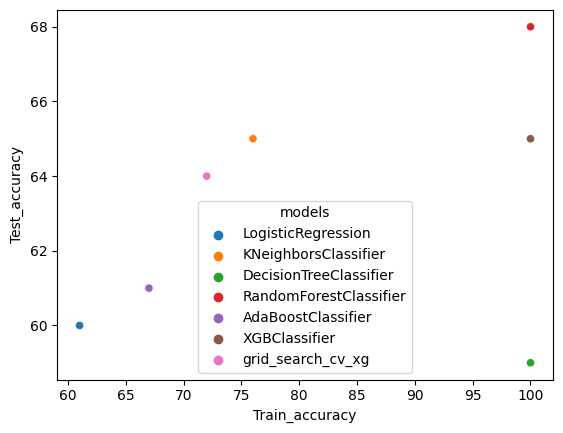

In [74]:
sns.scatterplot(x="Train_accuracy",y="Test_accuracy",hue=df1["models"],data=df1)